# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline

# **Load Dataset**

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# **Data-Preprocessing**

### Drop unnecessary columns (example columns; adjust based on your dataset)

In [4]:
df.drop(["availability", "society"], axis=1, inplace=True)

### Convert 'size' to 'bhk' (numerical)

In [5]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(" ")[0]) if pd.notna(x) else x)
df.drop("size", axis=1, inplace=True)

### Handle missing values

In [6]:
df.dropna(inplace=True)

### Handling duplicates values 

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

# **One-hot encode categorical variables**

In [10]:
encoded = pd.get_dummies(df, dtype=int)
encoded

,bath,balcony,price,bhk,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Anekal,location_ Banaswadi,...,total_sqft_990,total_sqft_991,total_sqft_992,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_997,total_sqft_998,total_sqft_999
0,2.0,1.0,39.07,2.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,3.0,120.00,4.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,62.00,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1.0,95.00,3.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,51.00,2.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13312,2.0,2.0,47.00,2.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,3.0,3.0,112.00,3.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,4.0,0.0,231.00,5.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,2.0,1.0,60.00,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Split features and target**

In [11]:
X = encoded.drop('price', axis=1) # Assuming 'price' is the target column
y = encoded['price']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (12025, 3248)
Shape of y =  (12025,)


# **Train-test split**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4545)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (8417, 3248)
Shape of y_train =  (8417,)
Shape of X_test =  (3608, 3248)
Shape of y_test =  (3608,)


# **Standardize features**

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Model Training**

In [14]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred_train = model.predict(X_train)
print(f"Training score: {r2_score(y_train,y_pred_train)}")
print(f"Absolute error: {mean_absolute_error(y_train,y_pred_train)}")

Training score: 0.8749289395699105
Absolute error: 20.607281650947233


In [16]:
y_pred_test = model.predict(X_test)
print(f"Training score: {r2_score(y_test,y_pred_test)}")
print(f"Absolute error: {mean_absolute_error(y_test,y_pred_test)}")

Training score: 0.4880864084793429
Absolute error: 41.101599028279765


# **Feature Selection: Select the top k features**

In [17]:
k = 100  # Choose a manageable number of features
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print('Shape of X_train_selected = ', X_train_selected.shape)
print('Shape of X_test_selected = ', X_test_selected.shape)

Shape of X_train_selected =  (8417, 100)
Shape of X_test_selected =  (3608, 100)


# **Polynomial Regression on selected features**

In [18]:
poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(X_train_selected)
X_test_poly = poly_reg.transform(X_test_selected)

print('Shape of X_train_poly = ', X_train_poly.shape)
print('Shape of X_test_poly = ', X_test_poly.shape)

Shape of X_train_poly =  (8417, 5151)
Shape of X_test_poly =  (3608, 5151)


# **Train polynomial regression model**

In [19]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [20]:
lr.score(X_train_poly, y_train)

0.8016273754013912

In [21]:
lr.score(X_test_poly, y_test,)

0.3676890717192872

In [22]:
lr.predict([X_test_poly[0,:]])

array([66.65402751])

In [23]:
y_pred = lr.predict(X_test_poly)
y_pred

array([ 66.65402751,  64.60028402, 105.10475335, ...,  61.44784739,
        62.91494501, 205.67033283])

In [24]:
y_test

11287     98.49
1563      46.55
7523     168.00
5883     300.00
11452    162.00
          ...  
6113      78.00
4420      86.00
5905      58.00
6390      48.00
6863     135.00
Name: price, Length: 3608, dtype: float64

In [25]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mse, rmse

(14125.563961045225, np.float64(118.85101581831442))

In [26]:
# Evaluate the model
y_pred_train_poly = lr.predict(X_train_poly)
y_pred_test_poly = lr.predict(X_test_poly)

print(f"Polynomial Regression Training R2 score: {r2_score(y_train, y_pred_train_poly)}")
print(f"Polynomial Regression Testing R2 score: {r2_score(y_test, y_pred_test_poly)}")
print(f"Polynomial Regression Training MAE: {mean_absolute_error(y_train, y_pred_train_poly)}")
print(f"Polynomial Regression Testing MAE: {mean_absolute_error(y_test, y_pred_test_poly)}")

Polynomial Regression Training R2 score: 0.8016273754013912
Polynomial Regression Testing R2 score: 0.3676890717192872
Polynomial Regression Training MAE: 33.63072027096593
Polynomial Regression Testing MAE: 44.42389230658503


# **Simple Linear Regression on same Data** 

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
lr.score(X_train,y_train)

0.8749289395699105

In [29]:
lr.score(X_test,y_test)

0.4880864084793429

# **Generating Random Data** 
 - # y = 0.8x^2 + 0.9x + 2

In [30]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

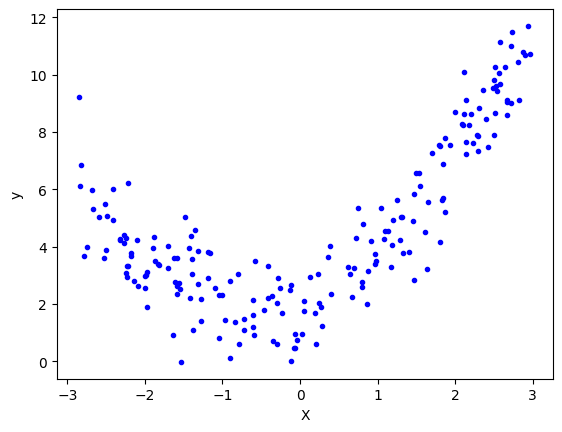

In [31]:
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [32]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
# Applying linear regression
lr = LinearRegression()

In [34]:
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.5587452567926412

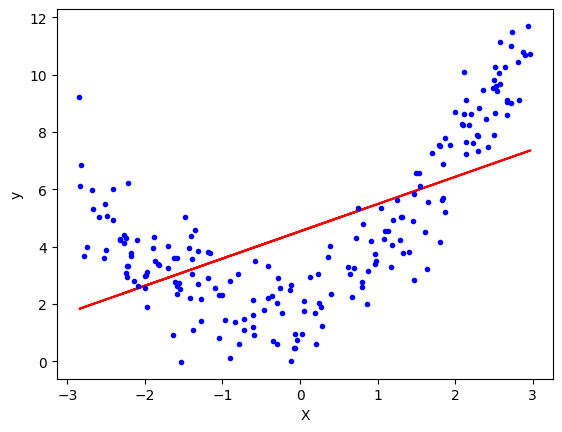

In [36]:
plt.plot(X_train,lr.predict(X_train), color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# **Applying Polynomial Linear Regression**

In [37]:
poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [38]:
print(X_train[0])
print(X_train_trans[0])

[0.8058258]
[1.         0.8058258  0.64935522]


In [39]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [40]:
y_pred = lr.predict(X_test_trans)

In [41]:
r2_score(y_test,y_pred)

0.875728623454529

In [42]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.87885597 0.81629955]]
[2.0433551]


# **Generating Testing Data**

In [43]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

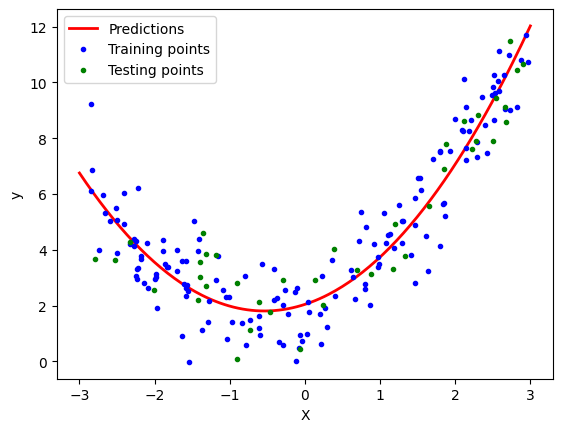

In [44]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

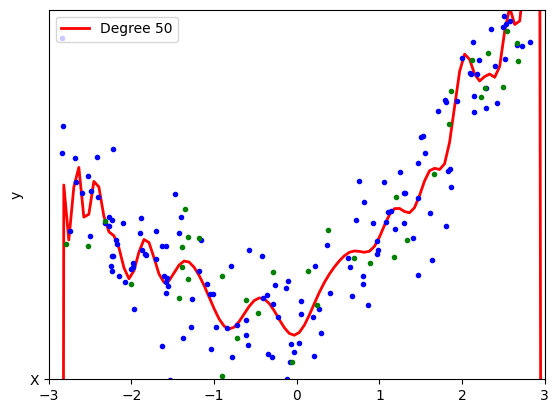

In [45]:
def polynomial_regression(degree):
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    
    plt.plot(X_new, y_newbig, 'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.plot("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

polynomial_regression(50)


In [46]:
poly.powers_

array([[0],
       [1],
       [2]])

# **Applying Gradient Descent**

c:\Users\zafir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


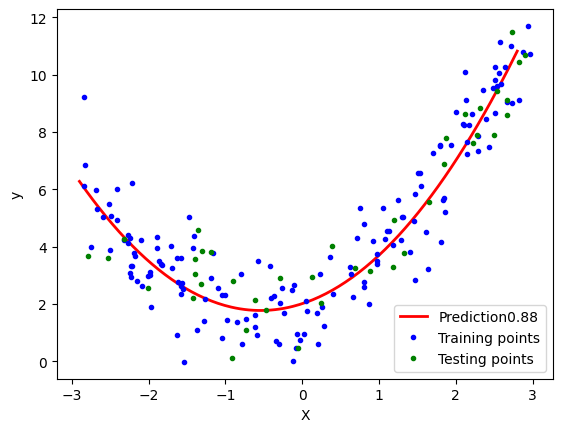

In [47]:
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans, y_train)

X_new = np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Prediction" + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.", label='Training points')
plt.plot(X_test, y_test, "g.", label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# **3D polynomial regression**

In [48]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100, 1)

In [49]:
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [50]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1, 100), yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [51]:
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x = x_input, y = y_input, z = z_final))
fig.show()

In [52]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [53]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [54]:
print("Input",poly.n_features_in_)
print("Output",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 2
Output 496
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]
 [13  1]
 [12  2]
 

In [55]:
X_multi_trans.shape

(100, 496)

In [56]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [57]:
X_test_multi = poly.transform(final)

In [58]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [59]:
fig = px.scatter_3d(x = x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x = x_input, y = y_input, z = z_final))
fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))
fig.show()